# Lending Club Loan Analysis

In this project, we use supervised learning models to predict the loan will be defaulted or not. 

## Contents

* [Part 1: Load Data](#Part-1:-Load-Data)
* [Part 2: Data Preprocess](#Part-2:-Data-Preprocess)
* [Part 3: Data Cleaning](#Part-3:-Data-Cleaning)
* [Part 4: Data Visualization](#Part-4:-Data-Visualization)
* [Part 5: Feature Selection](#Part-5:-Feature-Selection)
* [Part 6: Model Selection](#Part-6:-Model-Selection)
* [Part 7: Model Evaluation](#Part-7:-Model-Evaluation)
* [Part 8: Summary](#Part-7:-Summary)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Part 1: Load Dataset

The raw dataset are stored in data/ directory. The two-year data files are separated into 4 quarters for each year. 

In [2]:
# read raw data
data_2016_Q1 = pd.read_csv('./data/2016Q1.csv.gz')
data_2016_Q2 = pd.read_csv('./data/2016Q2.csv.gz')
data_2016_Q3 = pd.read_csv('./data/2016Q3.csv.gz')
data_2016_Q4 = pd.read_csv('./data/2016Q4.csv.gz')
data_2017_Q1 = pd.read_csv('./data/2017Q1.csv.gz')
data_2017_Q2 = pd.read_csv('./data/2017Q2.csv.gz')
data_2017_Q3 = pd.read_csv('./data/2017Q3.csv.gz')
data_2017_Q4 = pd.read_csv('./data/2017Q4.csv.gz')

## Part 2: Data Preprocess

In [3]:
# combine same year data
data_2016 = pd.concat([data_2016_Q1, data_2016_Q2, data_2016_Q3, data_2016_Q4], axis=0)
data_2017 = pd.concat([data_2017_Q1, data_2017_Q2, data_2017_Q3, data_2017_Q4], axis=0)

In [4]:
data_2016.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,75910406,NaN,8400,8400,8400.0,36 months,9.75%,270.06,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,75768614,NaN,12000,12000,12000.0,36 months,7.89%,375.43,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,75650131,NaN,28000,28000,28000.0,36 months,7.39%,869.57,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,76084025,NaN,10000,10000,10000.0,36 months,13.67%,340.18,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,76003313,NaN,20000,20000,20000.0,36 months,11.99%,664.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_2017.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,104045864,NaN,12000,12000,12000.0,36 months,7.99%,375.99,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,104090121,NaN,20000,20000,20000.0,36 months,15.99%,703.05,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,104048783,NaN,13000,13000,13000.0,36 months,11.44%,428.32,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,102675947,NaN,14000,14000,14000.0,60 months,15.99%,340.38,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100075977,NaN,13000,13000,13000.0,36 months,6.99%,401.35,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434407 entries, 0 to 103545
Columns: 152 entries, Unnamed: 0 to settlement_term
dtypes: float64(68), int64(46), object(38)
memory usage: 507.1+ MB


In [7]:
data_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443579 entries, 0 to 118647
Columns: 152 entries, Unnamed: 0 to settlement_term
dtypes: float64(57), int64(57), object(38)
memory usage: 517.8+ MB


In [8]:
# dimensionans of dataset
print ('2016 dataset has ' + str(data_2016.shape[0]) + ' rows and ' + str(data_2016.shape[1]) + ' columns')
print ('2017 dataset has ' + str(data_2017.shape[0]) + ' rows and ' + str(data_2017.shape[1]) + ' columns')

2016 dataset has 434407 rows and 152 columns
2017 dataset has 443579 rows and 152 columns


In [9]:
# combine two 2016, 2017 datasets
data = pd.concat([data_2016, data_2017], axis=0)
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,75910406,NaN,8400,8400,8400.0,36 months,9.75%,270.06,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,75768614,NaN,12000,12000,12000.0,36 months,7.89%,375.43,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,75650131,NaN,28000,28000,28000.0,36 months,7.39%,869.57,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,76084025,NaN,10000,10000,10000.0,36 months,13.67%,340.18,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,76003313,NaN,20000,20000,20000.0,36 months,11.99%,664.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877986 entries, 0 to 118647
Columns: 152 entries, Unnamed: 0 to settlement_term
dtypes: float64(68), int64(45), object(39)
memory usage: 1.0+ GB


## Part 3: Data Cleaning 

In [11]:
# Get unique count for each feature
data.nunique()

Unnamed: 0                                    133887
id                                            877986
member_id                                          0
loan_amnt                                       1560
funded_amnt                                     1560
funded_amnt_inv                                 1572
term                                               2
int_rate                                         170
installment                                    59346
grade                                              7
sub_grade                                         35
emp_title                                     205587
emp_length                                        11
home_ownership                                     5
annual_inc                                     46617
verification_status                                3
issue_d                                           24
loan_status                                        7
pymnt_plan                                    

### Part 3.0: Duplicated Data

In [12]:
# duplicated values
print ('duplicated rows =', data.duplicated().sum())
print ('duplicated columns =', data.columns.duplicated().sum())

duplicated rows = 0
duplicated columns = 0


### Part 3.1: Missing Data

In [13]:
# total missing values
print ('missing value =', data.isnull().sum().sum())

missing value = 36443546


We see that there are lots of missing data, and we will remove features with no-entry first.

In [14]:
# missing values
data.isnull().sum()

Unnamed: 0                                         0
id                                                 0
member_id                                     877986
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      60837
emp_length                                     60085
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                    

In [15]:
# missing ratio
missing_data = round(data.isnull().sum() / len(data), 2) * 100
print(missing_data)

Unnamed: 0                                      0.0
id                                              0.0
member_id                                     100.0
loan_amnt                                       0.0
funded_amnt                                     0.0
funded_amnt_inv                                 0.0
term                                            0.0
int_rate                                        0.0
installment                                     0.0
grade                                           0.0
sub_grade                                       0.0
emp_title                                       7.0
emp_length                                      7.0
home_ownership                                  0.0
annual_inc                                      0.0
verification_status                             0.0
issue_d                                         0.0
loan_status                                     0.0
pymnt_plan                                      0.0
url         

In [16]:
# get unique missing ratios
missing_data.sort_values().unique()

array([  0.,   1.,   3.,   5.,   7.,  11.,  14.,  39.,  49.,  65.,  72.,
        76.,  82.,  94.,  96.,  98.,  99., 100.])

In [17]:
# list missing_columns with missing ratio greater than 90%
missing_columns = data.columns[missing_data > 90]
print(missing_columns)

Index(['member_id', 'desc', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlem

In [18]:
print('There are ' + str(len(missing_columns)) + ' columns with missing ratio greater than 90%.')

There are 38 columns with missing ratio greater than 90%.


In [19]:
# drop columns with 90% missing data
data = data.drop(missing_columns, axis=1)
print(data.shape)

(877986, 114)


In [20]:
missing_data = round(data.isnull().sum() / len(data), 2) * 100
print(missing_data.sort_values(ascending=False))

mths_since_last_record            82.0
mths_since_recent_bc_dlq          76.0
mths_since_last_major_derog       72.0
mths_since_recent_revol_delinq    65.0
mths_since_last_delinq            49.0
next_pymnt_d                      39.0
il_util                           14.0
mths_since_recent_inq             11.0
emp_title                          7.0
emp_length                         7.0
num_tl_120dpd_2m                   5.0
mths_since_rcnt_il                 3.0
mo_sin_old_il_acct                 3.0
title                              3.0
mths_since_recent_bc               1.0
bc_util                            1.0
bc_open_to_buy                     1.0
percent_bc_gt_75                   1.0
revol_bal                          0.0
pub_rec                            0.0
open_acc                           0.0
inq_last_6mths                     0.0
revol_util                         0.0
debt_settlement_flag               0.0
total_acc                          0.0
initial_list_status      

In [21]:
missing_columns = data.columns[missing_data > 0]
print('There are ' + str(len(missing_columns)) + ' columns with missing values.')

There are 18 columns with missing values.


Columns descrition based on the data_dictionary: 

mths_since_last_record         (82%): The number of months since the last public record

mths_since_recent_bc_dlq       (76%): Months since most recent bankcard delinquency

mths_since_last_major_derog    (72%): Months since most recent 90-day or worse rating

mths_since_recent_revol_delinq (65%): Months since most recent revolving delinquency

mths_since_last_delinq         (49%): The number of months since the borrower's last delinquency

next_pymnt_d                   (39%): Next scheduled payment date

il_util                        (14%): Ratio of total current balance to high credit/credit limit on all install acct

mths_since_recent_inq          (11%): Months since most recent inquiry

emp_title                      ( 7%): The job title supplied by the Borrower when applying for the loan

emp_length                     ( 7%): Employment length in years. 

num_tl_120dpd_2m               ( 5%): Number of accounts currently 120 days past due

mths_since_rcnt_il             ( 3%): Months since most recent installment accounts opened

mo_sin_old_il_acct             ( 3%): Months since oldest bank installment account opened

title                          ( 3%): The loan title provided by the borrower

mths_since_recent_bc           ( 1%): Months since most recent bankcard account opened

bc_util                        ( 1%): Ratio of total current balance to high credit/credit limit for all bankcard accounts

bc_open_to_buy                 ( 1%): Total open to buy on revolving bankcards

percent_bc_gt_75               ( 1%): Percentage of all bankcard accounts > 75% of limit

__These 18 columns with missing values are worth disccussing whether they are related to the scope of this project.__

In [22]:
# drop columns with 10% missing data
data = data.drop(data.columns[missing_data > 10], axis=1)
print(data.shape)

(877986, 106)


So far, we have dropped columns with more than 10% missing values. 

Now we take a close look at the data with missing values less than 10%. 

#### 3.1.1 emp_title

In [23]:
# emp_title statistics
data['emp_title'].describe()

count      817149
unique     205587
top       Teacher
freq        16673
Name: emp_title, dtype: object

In [24]:
# look at first five entries of data['emp_title']
data['emp_title'].values[:5]

array(['RV Tech', 'facility manager', 'graphic designer ii', 'Cantor',
       'rn case manager'], dtype=object)

In [25]:
# fill the missing value in emp_title with 'missing'
data['emp_title'] = data['emp_title'].fillna(value='missing')

#### 3.1.2 emp_length 

In [26]:
# emp_length statistics
data['emp_length'].describe()

count        817901
unique           11
top       10+ years
freq         296029
Name: emp_length, dtype: object

In [27]:
# look at unique entries of data['emp_length']
data['emp_length'].sort_values().unique()

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', nan],
      dtype=object)

In [28]:
data['emp_length'].mode()

0    10+ years
dtype: object

In [29]:
# fill the missing value in emp_length with mode
emp_length_mode = data['emp_length'].mode()[0]
data['emp_length'] = data['emp_length'].fillna(value=emp_length_mode)

#### 3.1.3 num_tl_120dpd_2m   

In [30]:
# look at first five entries of data['num_tl_120dpd_2m']
data['num_tl_120dpd_2m'].values[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
# unique values in num_tl_120dpd_2m
data['num_tl_120dpd_2m'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  7., nan])

In [32]:
# num_tl_120dpd_2m statistics
data['num_tl_120dpd_2m'].describe()

count    834355.000000
mean          0.000888
std           0.032186
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: num_tl_120dpd_2m, dtype: float64

In [33]:
# fill the missing value in num_tl_120dpd_2m with 0
data['num_tl_120dpd_2m'] = data['num_tl_120dpd_2m'].fillna(value=0)

#### 3.1.4 mths_since_rcnt_il

In [34]:
# look at first ten entries of data['mths_since_rcnt_il']
data['mths_since_rcnt_il'].values[:10]

array([ 10., 165.,  41.,  35.,  34.,   8.,   4.,   7.,  11.,   5.])

In [35]:
# mths_since_rcnt_il statistics
data['mths_since_rcnt_il'].describe()

count    853102.000000
mean         21.298049
std          26.172225
min           0.000000
25%           7.000000
50%          13.000000
75%          24.000000
max         511.000000
Name: mths_since_rcnt_il, dtype: float64

In [36]:
# fill the missing value with the median in mths_since_recent_inq
mths_since_recent_inq_median = data['mths_since_rcnt_il'].median()
data['mths_since_rcnt_il'] = data['mths_since_rcnt_il'].fillna(value=mths_since_recent_inq_median)

#### 3.1.5 mo_sin_old_il_acct

In [37]:
# mo_sin_old_il_acct statistics
data['mo_sin_old_il_acct'].describe()

count    853157.000000
mean        125.787449
std          53.509897
min           0.000000
25%          97.000000
50%         130.000000
75%         154.000000
max         999.000000
Name: mo_sin_old_il_acct, dtype: float64

In [38]:
# fill the missing value with the median in mo_sin_old_il_acct
mo_sin_old_il_acct_median = data['mo_sin_old_il_acct'].median()
data['mo_sin_old_il_acct'] = data['mo_sin_old_il_acct'].fillna(value=mo_sin_old_il_acct_median)

#### 3.1.6 title   

In [39]:
# title statistics
data['title'].describe()

count                 854813
unique                    14
top       Debt consolidation
freq                  479644
Name: title, dtype: object

In [40]:
# unique values in title
data['title'].sort_values().unique()

array(['Business', 'Car financing', 'Credit Card Consolidation',
       'Credit card refinancing', 'Debt consolidation', 'Green loan',
       'Home buying', 'Home improvement', 'Learning and training',
       'Major purchase', 'Medical expenses', 'Moving and relocation',
       'Other', 'Vacation', nan], dtype=object)

In [41]:
# fill the missing value in title with 'missing'
data['title'] = data['title'].fillna(value='missing')

#### 3.1.7 mths_since_recent_bc

In [42]:
# mths_since_recent_bc statistics
data['mths_since_recent_bc'].describe()

count    868179.000000
mean         24.379527
std          32.569366
min           0.000000
25%           6.000000
50%          13.000000
75%          29.000000
max         656.000000
Name: mths_since_recent_bc, dtype: float64

In [43]:
# fill the missing value with the median in mths_since_recent_bc
mths_since_recent_bc_median = data['mths_since_recent_bc'].median()
data['mths_since_recent_bc'] = data['mths_since_recent_bc'].fillna(value=mths_since_recent_bc_median)

#### 3.1.8 bc_util

In [44]:
# bc_util statistics
data['bc_util'].describe()

count    867203.000000
mean         56.683403
std          28.542247
min           0.000000
25%          34.000000
50%          58.200000
75%          81.800000
max         252.300000
Name: bc_util, dtype: float64

In [45]:
# fill the missing value with the median in bc_util
bc_util_median = data['bc_util'].median()
data['bc_util'] = data['bc_util'].fillna(value=bc_util_median)

#### 3.1.9 bc_open_to_buy

In [46]:
# bc_open_to_buy statistics
data['bc_open_to_buy'].describe()

count    867607.000000
mean      11611.298961
std       16634.741515
min           0.000000
25%        1908.000000
50%        5768.000000
75%       14466.000000
max      711140.000000
Name: bc_open_to_buy, dtype: float64

In [47]:
# fill the missing value with the median in percent_bc_gt_75
bc_open_to_buy_median = data['bc_open_to_buy'].median()
data['bc_open_to_buy'] = data['bc_open_to_buy'].fillna(value=bc_open_to_buy_median)  

#### 3.1.10 percent_bc_gt_75  

In [48]:
# percent_bc_gt_75 statistics
data['percent_bc_gt_75'].describe() 

count    867562.000000
mean         40.827452
std          36.190550
min           0.000000
25%           0.000000
50%          33.300000
75%          66.700000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

In [49]:
# fill the missing value with the median in percent_bc_gt_75
percent_bc_gt_75_median = data['percent_bc_gt_75'].median()
data['percent_bc_gt_75'] = data['percent_bc_gt_75'].fillna(value=percent_bc_gt_75_median)  

In [50]:
# total missing values
print ('missing value =', data.isnull().sum().sum())

missing value = 3268


In [51]:
# total missing values
print ('missing value =', data.isnull().sum().sort_values(ascending=False))

missing value = last_pymnt_d                  1117
revol_util                     708
dti                            577
all_util                       151
inq_last_12m                    62
total_cu_tl                     62
open_acc_6m                     62
open_il_24m                     61
inq_fi                          61
max_bal_bc                      61
open_rv_24m                     61
open_rv_12m                     61
total_bal_il                    61
open_il_12m                     61
open_act_il                     61
last_credit_pull_d              21
avg_cur_bal                     18
inq_last_6mths                   1
zip_code                         1
revol_bal                        0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_prncp                  0
out_prncp                        0
total_rec_int                    0
out_prncp_inv                    0
total_rec_late_fee               0
recoveries                       0
coll

In [52]:
# missing ratio
missing_data = round(data.isnull().sum() / len(data), 10) * 100
print(missing_data.sort_values(ascending=False))

last_pymnt_d                  0.127223
revol_util                    0.080639
dti                           0.065719
all_util                      0.017198
inq_last_12m                  0.007062
total_cu_tl                   0.007062
open_acc_6m                   0.007062
open_il_24m                   0.006948
inq_fi                        0.006948
max_bal_bc                    0.006948
open_rv_24m                   0.006948
open_rv_12m                   0.006948
total_bal_il                  0.006948
open_il_12m                   0.006948
open_act_il                   0.006948
last_credit_pull_d            0.002392
avg_cur_bal                   0.002050
inq_last_6mths                0.000114
zip_code                      0.000114
revol_bal                     0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
out_prncp                     0.000000
total_rec_int                 0.000000
out_prncp_inv            

In [53]:
# fill the missing value with the median in dti 
dti_median = data['dti'].median()
data['dti'] = data['dti'].fillna(value=dti_median)

We have cleaned missing data in the dataset. 

Next, we will take a look at the data types and its format.

### Part 3.2: Data Type

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877986 entries, 0 to 118647
Columns: 106 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(36), int64(45), object(25)
memory usage: 716.7+ MB


In [55]:
data.dtypes

Unnamed: 0                      int64
id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
fico_range_l

In [56]:
data.select_dtypes(include=['object'])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,9.75%,B,B3,RV Tech,2 years,MORTGAGE,Not Verified,Mar-16,Fully Paid,...,GA,Jun-05,78.40%,w,Dec-17,Dec-17,Individual,N,Cash,N
1,36 months,7.89%,A,A5,facility manager,3 years,OWN,Source Verified,Mar-16,Current,...,OH,Aug-94,39.90%,w,Oct-18,Oct-18,Individual,N,Cash,N
2,36 months,7.39%,A,A4,graphic designer ii,1 year,RENT,Verified,Mar-16,Current,...,TX,Aug-94,34.40%,w,Oct-18,Oct-18,Individual,N,Cash,N
3,36 months,13.67%,C,C3,Cantor,10+ years,RENT,Source Verified,Mar-16,Current,...,FL,Mar-89,16.10%,w,Oct-18,Oct-18,Individual,N,Cash,N
4,36 months,11.99%,C,C1,rn case manager,10+ years,MORTGAGE,Source Verified,Mar-16,Fully Paid,...,FL,Jun-01,89.70%,w,Aug-18,Aug-18,Individual,N,Cash,N
5,60 months,15.31%,C,C5,Director of Sales & Marketing,1 year,MORTGAGE,Not Verified,Mar-16,Fully Paid,...,IN,Jul-05,12.40%,w,Jun-18,Oct-18,Individual,N,Cash,N
6,36 months,9.16%,B,B2,Specialty scheduler,9 years,RENT,Source Verified,Mar-16,Current,...,CA,Jul-03,53.20%,w,Sep-18,Oct-18,Individual,N,Cash,N
7,60 months,19.53%,D,D5,superintendent,1 year,RENT,Not Verified,Mar-16,Charged Off,...,FL,Jun-12,40.60%,w,Sep-17,Oct-18,Individual,N,Cash,Y
8,36 months,12.99%,C,C2,Assistant Property Manager,10+ years,RENT,Not Verified,Mar-16,Current,...,GA,Aug-94,47%,w,Oct-18,Oct-18,Individual,N,Cash,N
9,60 months,13.67%,C,C3,HR Specialist,10+ years,MORTGAGE,Source Verified,Mar-16,Late (16-30 days),...,NJ,Sep-03,73.70%,w,Oct-18,Oct-18,Individual,N,Cash,N


In [57]:
data.select_dtypes(include=['object']).count()

term                    877986
int_rate                877986
grade                   877986
sub_grade               877986
emp_title               877986
emp_length              877986
home_ownership          877986
verification_status     877986
issue_d                 877986
loan_status             877986
pymnt_plan              877986
url                     877986
purpose                 877986
title                   877986
zip_code                877985
addr_state              877986
earliest_cr_line        877986
revol_util              877278
initial_list_status     877986
last_pymnt_d            876869
last_credit_pull_d      877965
application_type        877986
hardship_flag           877986
disbursement_method     877986
debt_settlement_flag    877986
dtype: int64

#### 3.2.1 term

In [58]:
data['term'].describe()

count         877986
unique             2
top        36 months
freq          643914
Name: term, dtype: object

In [59]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [60]:
# remove the heading and trailing whitespaces
data['term'] = data['term'].apply(lambda x: x.strip())

In [61]:
# encode term into numerical variable
term_map = {'36 months': 36, '60 months': 60} 
data['term'] = data['term'].apply(lambda x: term_map[x])

In [62]:
data['term'][0]

0    36
0    60
0    36
0    36
0    36
0    36
0    36
0    60
Name: term, dtype: int64

#### 3.2.2 emp_title

In [63]:
data['emp_title'].describe()

count      877986
unique     205588
top       missing
freq        60837
Name: emp_title, dtype: object

In [64]:
# emp_title has to many inputs, we can delete this column.
data = data.drop('emp_title', axis=1)

#### 3.2.3 emp_length

In [65]:
data['emp_length'].unique()

array(['2 years', '3 years', '1 year', '10+ years', '9 years', '6 years',
       '5 years', '8 years', '7 years', '< 1 year', '4 years'],
      dtype=object)

In [66]:
# encode emp_length into numerical variable
emp_length_map = {'< 1 year': 0, 
                  '1 year': 1, 
                  '2 years': 2, 
                  '3 years': 3, 
                  '4 years': 4, 
                  '5 years': 5, 
                  '6 years': 6, 
                  '7 years': 7, 
                  '8 years': 9, 
                  '9 years': 9, 
                  '10+ years': 10}
data['emp_length'] = data['emp_length'].apply(lambda x: emp_length_map[x])

In [67]:
data['emp_length'][0]

0     2
0    10
0    10
0    10
0     9
0     5
0    10
0     7
Name: emp_length, dtype: int64

#### 3.2.4 home_ownership

In [68]:
data['home_ownership'].describe()

count       877986
unique           5
top       MORTGAGE
freq        428639
Name: home_ownership, dtype: object

In [69]:
data['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY', 'NONE'], dtype=object)

In [70]:
data['home_ownership'].value_counts()

MORTGAGE    428639
RENT        343387
OWN         105451
ANY            505
NONE             4
Name: home_ownership, dtype: int64

In [71]:
# combine ANY and NONE type into Other
data.loc[data['home_ownership'].isin(['ANY', 'NONE']), 'home_ownership'] = 'Other'

#### 3.2.5 int_rate, revol_util

In [72]:
# convert int_rate to float
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [73]:
data.select_dtypes(include=['float'])

,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,total_cu_tl,inq_last_12m,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mths_since_recent_bc,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75
0,8400.0,9.75,270.06,66000.0,13.84,1.0,0.00,0.00,9449.400972,9449.40,...,1.0,3.0,22436.0,585.0,90.6,129.0,89.0,0.0,86.4,100.0
1,12000.0,7.89,375.43,45000.0,15.65,0.0,2201.55,2201.55,11252.380000,11252.38,...,0.0,2.0,2664.0,33197.0,40.4,165.0,9.0,0.0,93.7,66.7
2,28000.0,7.39,869.57,60000.0,21.48,0.0,5106.41,5106.41,26064.110000,26064.11,...,0.0,0.0,4846.0,32803.0,34.4,128.0,37.0,0.0,100.0,20.0
3,10000.0,13.67,340.18,70000.0,14.74,1.0,1961.93,1961.93,10190.210000,10190.21,...,0.0,2.0,6764.0,9343.0,16.1,123.0,2.0,0.0,75.0,0.0
4,20000.0,11.99,664.20,49000.0,15.58,0.0,0.00,0.00,23693.642610,23693.64,...,5.0,0.0,15740.0,481.0,96.3,122.0,111.0,0.0,82.1,100.0
5,13625.0,15.31,326.36,50000.0,30.41,0.0,0.00,0.00,17419.444030,17419.44,...,3.0,6.0,10766.0,57506.0,14.0,120.0,7.0,0.0,100.0,11.1
6,9000.0,9.16,286.87,60000.0,21.12,0.0,1676.09,1676.09,8583.200000,8583.20,...,2.0,1.0,4914.0,3612.0,61.2,128.0,24.0,0.0,94.7,50.0
7,15000.0,19.53,393.50,63890.0,20.36,1.0,0.00,0.00,9201.790000,9201.79,...,2.0,8.0,5749.0,6293.0,40.6,37.0,6.0,0.0,100.0,25.0
8,18000.0,12.99,606.41,53000.0,13.09,0.0,3511.07,3511.07,18166.320000,18166.32,...,1.0,0.0,1548.0,4840.0,57.2,101.0,17.0,0.0,94.7,0.0
9,12000.0,13.67,277.18,68000.0,17.17,4.0,7172.43,7172.43,8090.630000,8090.63,...,2.0,7.0,6525.0,1774.0,74.7,109.0,6.0,0.0,84.8,75.0


In [74]:
data.select_dtypes(include=['int'])

,Unnamed: 0,id,loan_amnt,funded_amnt,term,emp_length,delinq_2yrs,fico_range_low,fico_range_high,open_acc,...,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,0,75910406,8400,8400,36,2,0,670,674,7,...,7,0,0,3,0,0,166260,30290,6200,21079
1,1,75768614,12000,12000,36,3,0,700,704,9,...,9,0,0,1,0,0,60100,23972,55700,0
2,2,75650131,28000,28000,36,1,0,790,794,6,...,6,0,0,0,0,0,87315,29077,50000,37315
3,3,76084025,10000,10000,36,10,0,705,709,4,...,4,0,0,1,1,0,54713,27057,11400,43313
4,4,76003313,20000,20000,36,10,1,675,679,8,...,8,0,0,0,0,0,140308,29637,13100,12193
5,5,76083306,13625,13625,60,1,0,745,749,21,...,21,0,0,3,0,0,275130,147437,66900,138047
6,6,76003618,9000,9000,36,9,0,675,679,10,...,10,0,0,1,1,0,57373,49144,9300,43473
7,7,73795709,15000,15000,60,1,0,675,679,7,...,7,0,0,3,0,0,56282,40244,10600,45682
8,8,76103663,18000,18000,36,10,0,700,704,10,...,10,0,0,1,0,0,28417,15477,11300,7200
9,9,76133761,12000,12000,60,10,0,660,664,12,...,12,0,0,4,0,0,91129,78305,7000,66129


## Part 4: Data Visualization

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877986 entries, 0 to 118647
Columns: 105 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(37), int64(47), object(21)
memory usage: 730.0+ MB


In [76]:
data.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=105)

The target variable, which we want to compare across the independent variables, is loan status. 

The variables in the dataset that will affect the loan status are grade, sub_grade, annual income, purpose of the loan, loan_amount, annual income, emp_length etc.

Here, we want to compare the average default rates across various independent variables and have a general idea about the variables that affect default rate.

#### 4.1 loan status

Let's first take a look at the target variable - loan_status.

In [77]:
# Visualize loan_status
loan_status = data.groupby('loan_status').size()
print(loan_status)

loan_status
Charged Off            80804
Current               503359
Default                  766
Fully Paid            264241
In Grace Period         8052
Late (16-30 days)       4505
Late (31-120 days)     16259
dtype: int64


Text(0, 0.5, '')

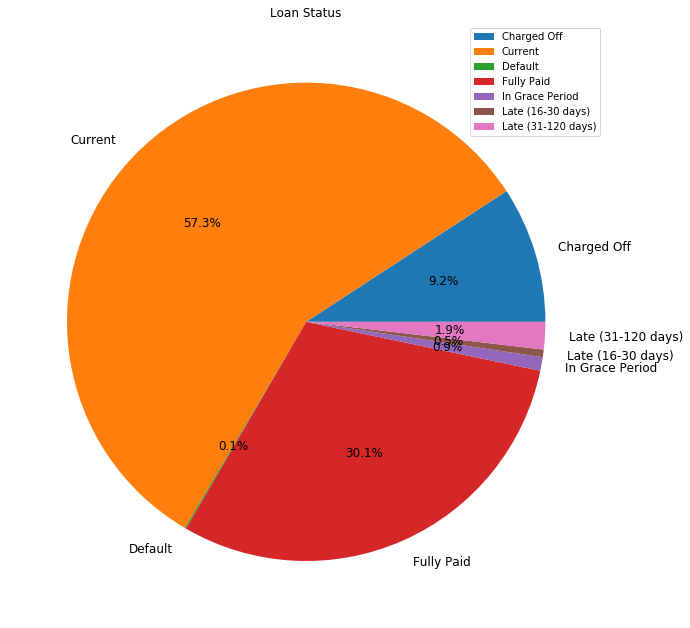

In [78]:
plot = loan_status.plot.pie(y='loan_status',figsize=(11, 11),autopct='%1.1f%%',legend=True,fontsize=12)
plt.title('Loan Status')
plt.xlabel('')
plt.ylabel('')

In this project, we are interested to know whether the loan is worth to invest or not, i.e., we want to know if the given loan is "good" or "bad". If the loan is "fully paid off", then it is good; it is bad if it is in the category of "charged off", "default", "late (16-30 days)" or "late (31-120 days)". For those that are in the "current" or "in grace period", we consider them as uncategoried due to uncertainty. 

In [79]:
category = ['Current','In Grace Period']
data = data[~data.loan_status.isin(category)]
data['loan_status'].value_counts()

Fully Paid            264241
Charged Off            80804
Late (31-120 days)     16259
Late (16-30 days)       4505
Default                  766
Name: loan_status, dtype: int64

In [80]:
# encode loan_status as 0 - good, 1 - bad
data['loan_status'] = data['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# convert loan_status to int
data['loan_status'] = data['loan_status'].apply(lambda x: pd.to_numeric(x))

data['loan_status'].value_counts()

0    264241
1    102334
Name: loan_status, dtype: int64

#### 4.2 loan grade and subgrade

In [81]:
# Visualize loan grade
loan_grade = data.groupby('grade').size()
print(loan_grade)

grade
A     53803
B    103395
C    114767
D     55377
E     25547
F      9863
G      3823
dtype: int64


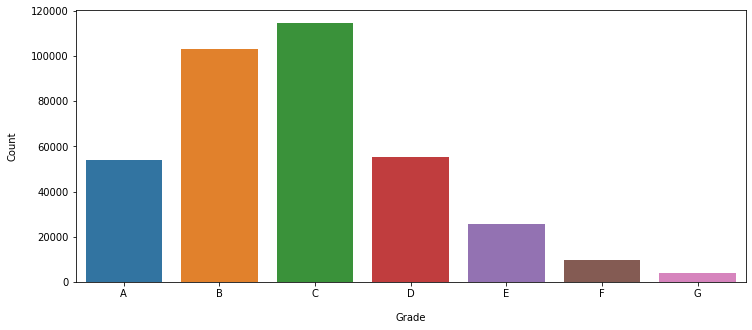

In [82]:
plt.figure(figsize=(12, 5))
sns.countplot(x='grade', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel("Grade", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.show()

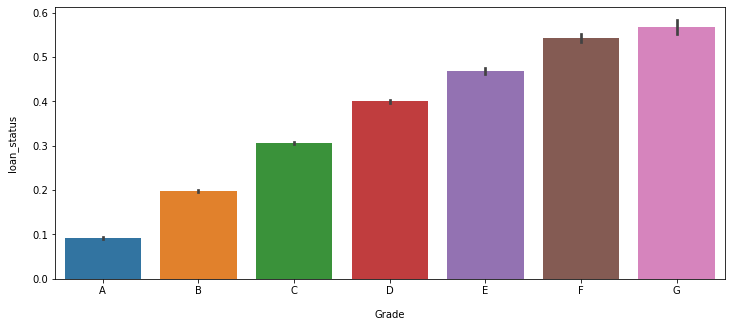

In [83]:
# plot default rates across grade of the loan
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='grade', y='loan_status', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.xlabel("Grade", labelpad=14)
plt.ylabel("loan_status", labelpad=14)
plt.show() 

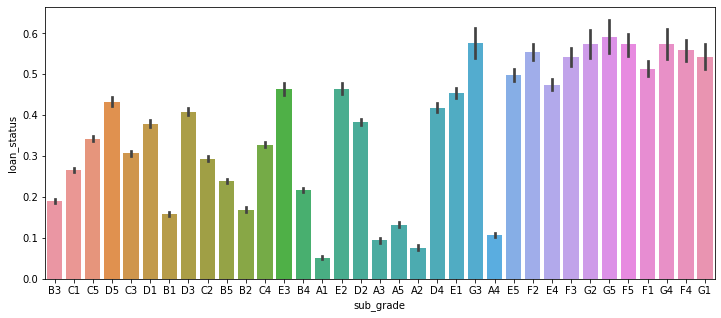

In [84]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='sub_grade', y='loan_status', data=data)

#### 4.3 loan title

In [85]:
data['title'].value_counts()

Debt consolidation         203517
Credit card refinancing     67852
Home improvement            27071
Other                       24885
missing                     13001
Major purchase               8823
Medical expenses             4928
Car financing                4099
Business                     3884
Vacation                     3051
Moving and relocation        2998
Home buying                  2195
Green loan                    271
Name: title, dtype: int64

In [86]:
# change into lower case
data['title'] = data['title'].apply(str.lower)
lists = ['debt consolidation', 'credit card refinancing', 'business', 'vacation', 
         'home improvement', 'major purchase', 'medical expenses', 'car financing', 
         'moving and relocation', 'home buying', 'green loan', 'consolidation']

data.loc[~data['title'].isin(lists), 'title'] = 'other'

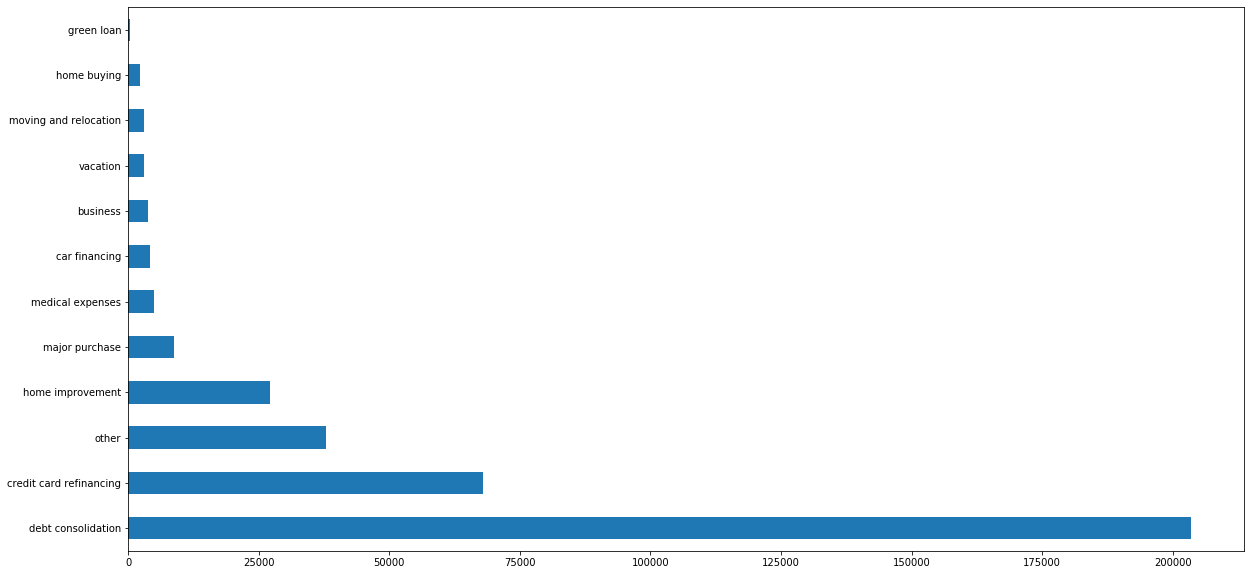

In [87]:
data['title'].value_counts().plot(kind='barh', figsize=(20,10))

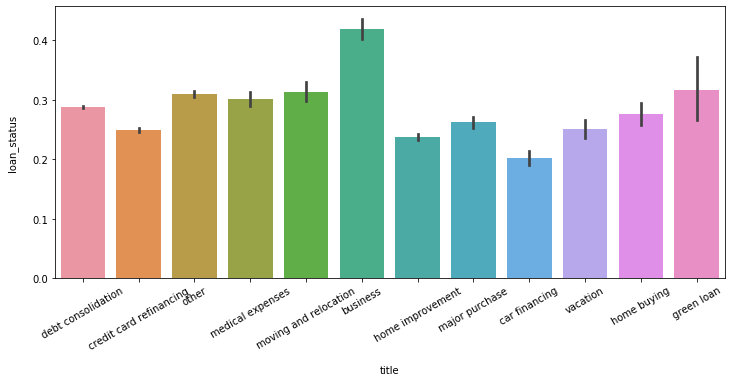

In [88]:
# plot default rates across loan title 
fig, ax = plt.subplots(figsize=(12, 5))
chart = sns.barplot(x='title', y='loan_status', data=data)
plt.xlabel("title", labelpad=14)
plt.ylabel("loan_status", labelpad=14)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
plt.show() 

#### 4.4 home_ownership

In [89]:
data['home_ownership'].value_counts()

MORTGAGE    181488
RENT        140479
OWN          44393
Other          215
Name: home_ownership, dtype: int64

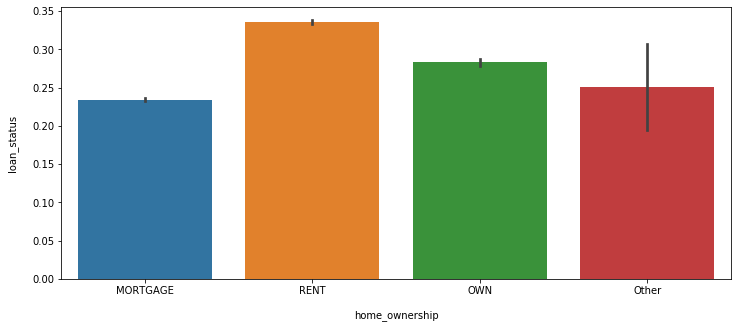

In [90]:
# plot default rates across home_ownership
fig, ax = plt.subplots(figsize=(12, 5))
chart = sns.barplot(x='home_ownership', y='loan_status', data=data)
plt.xlabel("home_ownership", labelpad=14)
plt.ylabel("loan_status", labelpad=14)
plt.show() 

#### 4.5 emp_length

In [91]:
data['emp_length'].describe()

count    366575.000000
mean          6.251908
std           3.772355
min           0.000000
25%           3.000000
50%           7.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

In [92]:
data['emp_length'].value_counts()

10    147442
2      33935
0      29815
3      29731
9      28172
1      24817
5      22493
4      21996
6      15722
7      12452
Name: emp_length, dtype: int64

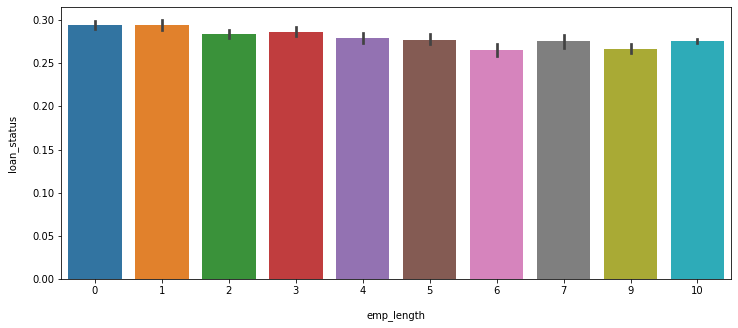

In [93]:
# plot default rates across emp_length
fig, ax = plt.subplots(figsize=(12, 5))
chart = sns.barplot(x='emp_length', y='loan_status', data=data)
plt.xlabel("emp_length", labelpad=14)
plt.ylabel("loan_status", labelpad=14)
plt.show() 

## Part 5: Feature Selection

The goal for this project is to predict whether a loan will be defaulted or not. To start with, let's identify the independent variables that are reated to the output - loan status. 

There are three types of independent variables that are closedly related to the defaultd loan. They are 

1. loan information, such as interest rate, loan amount, installment etc. 

2. application information, such as credit score, salary, occupation, age, assetts etc. 

3. customer behaviors which are generated after the loan is approved, such as delinquent amount, past-due amount. 

Notice that as an investor, we are not able to obtain type 3 - customer behaviors information before the loan is being approved. Hence, it cannot be included into the model prediction and we need to drop these features. 

#### 5.1 unrelated features

In [94]:
# drop variables that are related future customer behaviors
behavior_var = [
    'collection_recovery_fee',
    'delinq_2yrs',
    'delinq_amnt',
    'earliest_cr_line',
    'initial_list_status',
    'inq_fi',
    'inq_last_12m',
    'inq_last_6mths',
    'last_pymnt_amnt',
    'last_pymnt_d',
    'open_acc',
    'open_acc_6m',
    'out_prncp',
    'out_prncp_inv',
    'pub_rec',
    'pymnt_plan',
    'recoveries',
    'revol_bal',
    'revol_util',
    'total_acc',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'total_rec_prncp',
    'total_rev_hi_lim',
    'recoveries',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'last_credit_pull_d',
    'application_type',
    'disbursement_method',
    'debt_settlement_flag']

data = data.drop(behavior_var, axis=1)

In [95]:
data.columns

Index(['Unnamed: 0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'fico_range_low', 'fico_range_high', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_cu_tl',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_

In [96]:
print('There are about ' + str(data.shape[1]) + ' columns.')

There are about 75 columns.


We can also drop some unrelated variables, such as Unnamed: 0, id, url. 

In [97]:
# drop unrelated variables
data = data.drop(['Unnamed: 0', 'id', 'url', 'policy_code'], axis=1)

In [98]:
print('There are about ' + str(data.shape[1]) + ' columns.')

There are about 71 columns.


#### 5.2 highly-correlated numerical features

In [99]:
data.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int64
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int64
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
fico_range_low                  int64
fico_range_high                 int64
last_fico_range_high            int64
last_fico_range_low             int64
collections_12_mths_ex_med      int64
acc_now_delinq                  int64
tot_coll_amt                    int64
tot_cur_bal 

In [114]:
num_data = data.select_dtypes(exclude=['object'])
target = data['loan_status']
num_data = num_data.drop('loan_status', axis=1)
num_data.shape

(366575, 60)

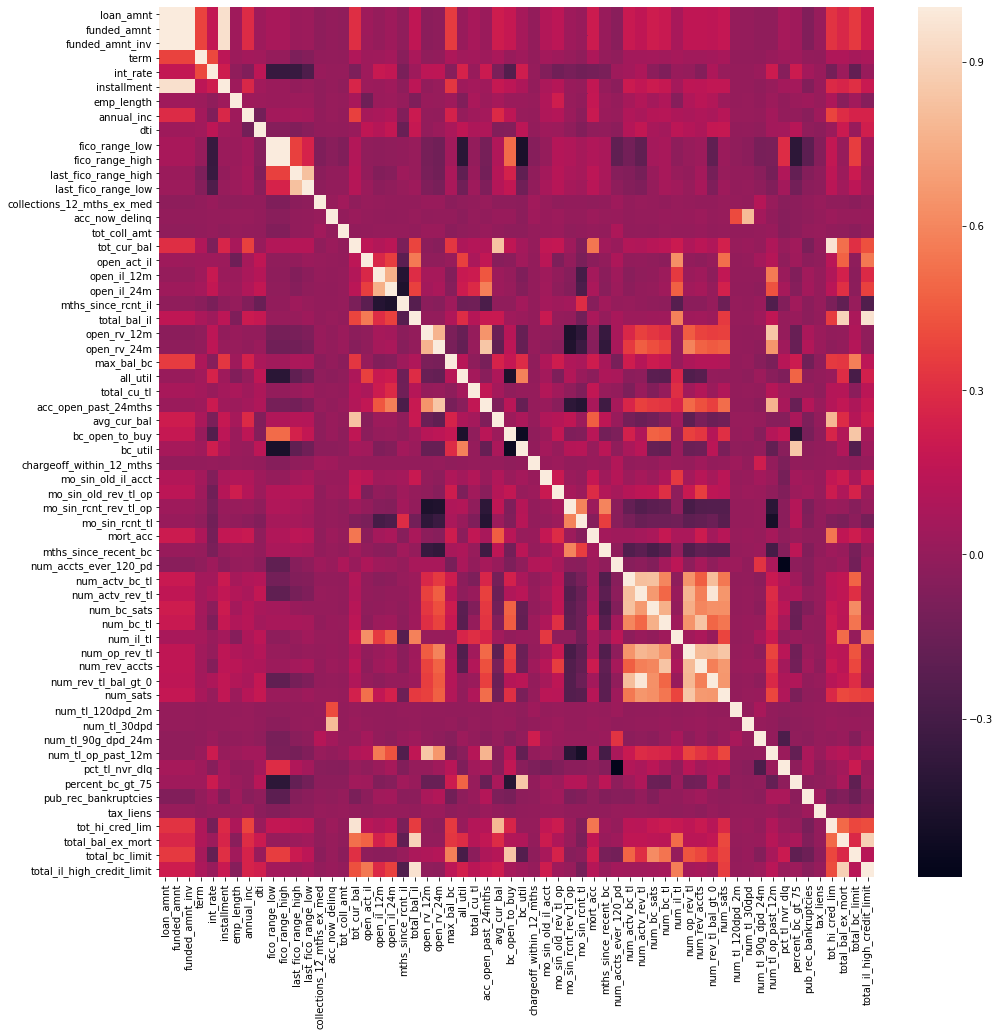

In [115]:
# calculate the pair-wise correlation for numerical features
correlation = num_data.corr()      

# visualize the pair-wise correlation             
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(correlation)
plt.show()

In [199]:
# check the actual values of correlations
correlation

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,fico_range_low,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,1.000000,0.999993,0.373470,0.172861,0.954403,0.044076,0.288178,0.036103,0.073641,...,-0.016588,-0.012628,0.067416,0.040105,-0.071035,0.013051,0.321291,0.272144,0.346212,0.214384
funded_amnt,1.000000,1.000000,0.999993,0.373470,0.172861,0.954403,0.044076,0.288178,0.036103,0.073641,...,-0.016588,-0.012628,0.067416,0.040105,-0.071035,0.013051,0.321291,0.272144,0.346212,0.214384
funded_amnt_inv,0.999993,0.999993,1.000000,0.373709,0.172877,0.954306,0.044103,0.288192,0.036040,0.073757,...,-0.016617,-0.012667,0.067452,0.040094,-0.071069,0.013026,0.321331,0.272133,0.346230,0.214363
term,0.373470,0.373470,0.373709,1.000000,0.394703,0.148465,0.028752,0.053819,0.048137,0.003056,...,-0.009737,0.016720,0.036496,0.038438,-0.001897,-0.007403,0.099962,0.097948,0.065304,0.086330
int_rate,0.172861,0.172861,0.172877,0.394703,1.000000,0.216877,-0.015226,-0.070467,0.151462,-0.356728,...,0.021062,0.209866,-0.047944,0.208784,0.054860,0.013929,-0.111792,0.027587,-0.184343,0.014440
installment,0.954403,0.954403,0.954306,0.148465,0.216877,1.000000,0.036570,0.270690,0.047308,0.020625,...,-0.012232,0.013089,0.052710,0.061678,-0.062361,0.018569,0.282410,0.256854,0.309070,0.199471
emp_length,0.044076,0.044076,0.044103,0.028752,-0.015226,0.036570,1.000000,0.037678,0.026119,0.020315,...,-0.008015,0.028813,-0.007894,0.021968,0.035427,0.009815,0.088678,-0.037617,0.046442,-0.052482
annual_inc,0.288178,0.288178,0.288192,0.053819,-0.070467,0.270690,0.037678,1.000000,-0.122219,0.056449,...,0.003431,0.052820,-0.001677,-0.000280,-0.036212,0.034795,0.381463,0.296553,0.253515,0.253781
dti,0.036103,0.036103,0.036040,0.048137,0.151462,0.047308,0.026119,-0.122219,1.000000,-0.050191,...,-0.012101,0.052378,0.060422,0.126620,-0.011358,-0.024179,0.020597,0.199963,0.019644,0.225889
fico_range_low,0.073641,0.073641,0.073757,0.003056,-0.356728,0.020625,0.020315,0.056449,-0.050191,1.000000,...,-0.099888,-0.093862,0.295593,-0.402020,-0.204450,-0.059751,0.174649,0.012666,0.358986,0.052759


In [116]:
# compare the correlation between features  
# remove one of two features that have a correlation >= 0.9

columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i + 1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = num_data.columns[columns]
num_data = num_data[selected_columns]

In [117]:
num_data.shape

(366575, 52)

In [126]:
num_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'fico_range_low', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'all_util', 'total_cu_tl', 'acc_open_past_24mths',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot

#### 5.3 identify feature importance

We will use feature imporatence feature in random forest algorithm. Note that columns with missing values cannot be put into the tree classifer, and hence we remove these columns. 

In [129]:
num_data.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
emp_length                     0
annual_inc                     0
dti                            0
fico_range_low                 0
last_fico_range_high           0
last_fico_range_low            0
collections_12_mths_ex_med     0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
open_act_il                   31
open_il_12m                   31
open_il_24m                   31
mths_since_rcnt_il             0
total_bal_il                  31
open_rv_12m                   31
open_rv_24m                   31
max_bal_bc                    31
all_util                      61
total_cu_tl                   32
acc_open_past_24mths           0
avg_cur_bal                    3
bc_open_to_buy                 0
bc_util                        0
chargeoff_within_12_mths       0
mo_sin_old_il_acct             0
mo_sin_old_rev_tl_op           0
mo_sin_rcn

In [130]:
num_data = num_data.dropna(axis='columns')
print(num_data.shape)

(366575, 42)


In [134]:
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(random_state=10)
extc = extc.fit(num_data, target)
importances = extc.feature_importances_

In [157]:
# drop features that are not important
features_to_drop = (importances <= 0.01)
features_indexes = np.where(features_to_drop == True)
print(features_indexes)

(array([ 1,  3,  9, 10, 11, 13, 14, 15, 17, 18, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]),)


In [155]:
# select num_features that with important > 0.01
select = (importances > 0.01)
num_data = num_data.iloc[:, select]

IndexError: indices are out-of-bounds

In [158]:
num_data.head()

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,last_fico_range_high,last_fico_range_low,tot_cur_bal,bc_util,mo_sin_old_rev_tl_op
0,8400,9.75,66000.0,13.84,670,759,755,157051,90.6,129
4,20000,11.99,49000.0,15.58,675,714,710,125922,96.3,112
5,13625,15.31,50000.0,30.41,745,754,750,204560,14.0,128
7,15000,19.53,63890.0,20.36,675,499,0,40244,40.6,45
9,12000,13.67,68000.0,17.17,660,609,605,78305,74.7,150


#### 5.4 categorical data

In [148]:
data.select_dtypes(include=['object'])

,grade,sub_grade,home_ownership,verification_status,issue_d,purpose,title,zip_code,addr_state,hardship_flag
0,B,B3,MORTGAGE,Not Verified,Mar-16,debt_consolidation,debt consolidation,301xx,GA,N
4,C,C1,MORTGAGE,Source Verified,Mar-16,debt_consolidation,debt consolidation,321xx,FL,N
5,C,C5,MORTGAGE,Not Verified,Mar-16,credit_card,credit card refinancing,476xx,IN,N
7,D,D5,RENT,Not Verified,Mar-16,debt_consolidation,debt consolidation,333xx,FL,N
9,C,C3,MORTGAGE,Source Verified,Mar-16,credit_card,credit card refinancing,080xx,NJ,N
11,B,B3,OWN,Source Verified,Mar-16,debt_consolidation,debt consolidation,933xx,CA,N
12,D,D1,MORTGAGE,Not Verified,Mar-16,debt_consolidation,debt consolidation,210xx,MD,N
13,C,C1,RENT,Verified,Mar-16,debt_consolidation,other,441xx,OH,N
14,B,B3,MORTGAGE,Verified,Mar-16,debt_consolidation,debt consolidation,377xx,TN,N
18,B,B1,OWN,Not Verified,Mar-16,credit_card,credit card refinancing,191xx,PA,N


In [169]:
# categorical features
cat_data = data.select_dtypes(include=['object']).drop(['sub_grade', 'issue_d', 'zip_code', 'addr_state'], axis=1)

In [170]:
cat_data.head()

,grade,home_ownership,verification_status,purpose,title,hardship_flag
0,B,MORTGAGE,Not Verified,debt_consolidation,debt consolidation,N
4,C,MORTGAGE,Source Verified,debt_consolidation,debt consolidation,N
5,C,MORTGAGE,Not Verified,credit_card,credit card refinancing,N
7,D,RENT,Not Verified,debt_consolidation,debt consolidation,N
9,C,MORTGAGE,Source Verified,credit_card,credit card refinancing,N


label encode the selected categorical feature. 

In [172]:
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()

In [182]:
# grade
cat_data['grade'] = lb_encode.fit_transform(cat_data['grade'])
#cat_data['grade'].value_counts()

# home_ownership
cat_data['home_ownership'] = lb_encode.fit_transform(cat_data['home_ownership'])
#cat_data['home_ownership'].value_counts()

# verification_status
cat_data['verification_status'] = lb_encode.fit_transform(cat_data['verification_status'])
#cat_data['verification_status'].value_counts()

cat_data['purpose'] = lb_encode.fit_transform(cat_data['purpose'])
#cat_data['purpose'].value_counts()

cat_data['title'] = lb_encode.fit_transform(cat_data['title'])
#cat_data['title'].value_counts()

cat_data['hardship_flag'] = lb_encode.fit_transform(cat_data['hardship_flag'])
#cat_data['hardship_flag'].value_counts()

In [181]:
cat_data['hardship_flag'].value_counts()

0    365723
1       852
Name: hardship_flag, dtype: int64

### 5.5 selected feature 

In [195]:
cat_data.head()

,grade,home_ownership,verification_status,purpose,title,hardship_flag
0,1,0,0,2,3,0
4,2,0,1,2,3,0
5,2,0,0,1,2,0
7,3,3,0,2,3,0
9,2,0,1,1,2,0


In [196]:
num_data.head()

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,last_fico_range_high,last_fico_range_low,tot_cur_bal,bc_util,mo_sin_old_rev_tl_op
0,8400,9.75,66000.0,13.84,670,759,755,157051,90.6,129
4,20000,11.99,49000.0,15.58,675,714,710,125922,96.3,112
5,13625,15.31,50000.0,30.41,745,754,750,204560,14.0,128
7,15000,19.53,63890.0,20.36,675,499,0,40244,40.6,45
9,12000,13.67,68000.0,17.17,660,609,605,78305,74.7,150


In [194]:
y = data['loan_status']

In [197]:
X = pd.concat([num_data, cat_data], axis=1)
X.head()

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,last_fico_range_high,last_fico_range_low,tot_cur_bal,bc_util,mo_sin_old_rev_tl_op,grade,home_ownership,verification_status,purpose,title,hardship_flag
0,8400,9.75,66000.0,13.84,670,759,755,157051,90.6,129,1,0,0,2,3,0
4,20000,11.99,49000.0,15.58,675,714,710,125922,96.3,112,2,0,1,2,3,0
5,13625,15.31,50000.0,30.41,745,754,750,204560,14.0,128,2,0,0,1,2,0
7,15000,19.53,63890.0,20.36,675,499,0,40244,40.6,45,3,3,0,2,3,0
9,12000,13.67,68000.0,17.17,660,609,605,78305,74.7,150,2,0,1,1,2,0


In [198]:
y.value_counts()

0    264241
1    102334
Name: loan_status, dtype: int64

## Part 6: Model Selection

### 6.1 splitting dataset 

In [200]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, shuffle = False)

print('training data has ' + str(x_train.shape[0]) + ' observation with ' + str(x_train.shape[1]) + ' features')
print('test data has ' + str(x_test.shape[0]) + ' observation with ' + str(x_test.shape[1]) + ' features')

training data has 293260 observation with 16 features
test data has 73315 observation with 16 features


In [201]:
y_train.value_counts()

0    211322
1     81938
Name: loan_status, dtype: int64

In [203]:
y_train.value_counts() / len(y_train)

0    0.720596
1    0.279404
Name: loan_status, dtype: float64

In [204]:
# check the propotion of y = 1
print(y.sum() / y.shape * 100)

[27.91625179]


We see that the dataset is imbalanced. Before we train the model, we need to resample.

### 6.2 random downsampling

In [205]:
# add y_train to the X_train to get a new df
x_train['loan_status'] = y_train
df = x_train

In [206]:
x_train.head()

,loan_amnt,int_rate,annual_inc,dti,fico_range_low,last_fico_range_high,last_fico_range_low,tot_cur_bal,bc_util,mo_sin_old_rev_tl_op,grade,home_ownership,verification_status,purpose,title,hardship_flag,loan_status
0,8400,9.75,66000.0,13.84,670,759,755,157051,90.6,129,1,0,0,2,3,0,0
4,20000,11.99,49000.0,15.58,675,714,710,125922,96.3,112,2,0,1,2,3,0,0
5,13625,15.31,50000.0,30.41,745,754,750,204560,14.0,128,2,0,0,1,2,0,0
7,15000,19.53,63890.0,20.36,675,499,0,40244,40.6,45,3,3,0,2,3,0,1
9,12000,13.67,68000.0,17.17,660,609,605,78305,74.7,150,2,0,1,1,2,0,1


In [207]:
# downsampling: balance the labels so we have the same number of default loan as undefault.
default_number = len(df[df['loan_status'] == 1])
print("Number of default", default_number)

default = (df[df['loan_status'] == 1])

undefault = df[df['loan_status'] == 0].sample(n = default_number)
print("Number of undefault", len(undefault))

df2 = default.append(undefault)
print (df2.shape)

Number of default 81938
Number of undefault 81938
(163876, 17)


In [208]:
# Y_train
Y_train = df2['loan_status']

# X_train
to_drop = ['loan_status']
X_train = df2.drop(to_drop, axis=1)

print (X_train.shape)
print (Y_train.shape)

(163876, 16)
(163876,)


### 6.3 scale dataset

In [209]:
# Scale the data, using standardization
# standardization (x-mean)/std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

### 6.4 model training

In [210]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# Random Forest
classifier_RF = RandomForestClassifier()

In [214]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression', 'Random Forest']
model_list = [classifier_logistic, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, Y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.92543324 0.92592141 0.92592141 0.92130957 0.90870812]
Model accuracy of Logistic Regression is 0.9214587505210758
[0.91869051 0.91972785 0.92021601 0.91639714 0.90318545]
Model accuracy of Random Forest is 0.9156433925139854


#### 6.4.1 Use Grid Search to Find Optimal Hyperparameters

In [215]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

##### Find Optimal Hyperparameters - LogisticRegression

In [216]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2

parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [217]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.9215016231785008
Best parameters set:
C:1
penalty:l1


In [218]:
# best model
best_LR_model = Grid_LR.best_estimator_

##### Find Optimal Hyperparameters - Random Forest

In [220]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [5,10,15]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [221]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.9187983597354097
Best parameters set:
n_estimators:15


In [222]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

## Part 7: Model Evaluation

In [225]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Logistic Regression
Accuracy is: 0.9250085248584874
precision is: 0.8938769035532995
recall is: 0.82883898803687


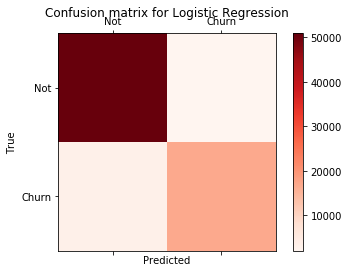

Random Forest
Accuracy is: 0.9211075496146764
precision is: 0.8810368206946907
recall is: 0.8282506373798784


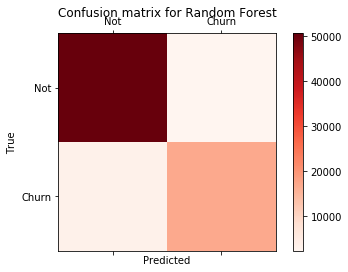

In [226]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(x_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(x_test)))
]

draw_confusion_matrices(confusion_matrices)

## Part 8: Summary

The goal of this project is to build a model that informs investor which loans they should invest. The Lending Club loan data consists in 8 files collected quartely in year of 2016 and 2017. There are 118647 rows and 152 columns in the combined dataset. 

The target variable is loan_status, and we categorized the 'loan_status' in terms of final prediction values: default or non-default. 

Since there are more than 100 features, we reduce the number of features by doing the following 

1. drop the features with more than 10% missing data;

2. drop the customer behavior features that are unknown before the loan is issued; 

3. remove highly correlated features.

Then we used the feature importance from tree classifier to select top 10 numberical features, and we also manually selected 6 categorical features. 

We implemented logistic regression and random forest models to classify the loan_status with approximately 90% accuracy. 

There are still several places that we can improve this project. 

1. Here we only considered 16 features. It is definitey worth to try to put more feature to see whether it can imporve the model performance. 

2. We built two predicted models. There are lots of other binary classification models, such as gradient boosting and neural network models. 

3. We used down-sampling to resample the training set. There are several other resampling methods, for exmaple, over-sampling and Synthetic Minority Oversampling Technique (SMOTE). And it is worth to compare the these results with the dataset without any resampling. 

4. Here, the dataset consists two-year (2016 and 2017) data values. It is also a good idea to add data in most recent years and modify the models based on the new dataset. 